In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [49]:
metrics = pd.read_csv(r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/analysis/tf/size_metrics_all.csv')

In [3]:
analysis_file_path = r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/analysis/tf'

In [4]:
import h5py

In [22]:
sizevals = [30,52,67,79,120]
orivals = range(0,360,45)
tfvals = [1,2]

In [6]:
session_id = 976843461

In [9]:
analysis_file = os.path.join(analysis_file_path, str(session_id)+'_st_analysis.h5')
expt_path = r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/Size_Tuning_'+str(session_id)+'_data.h5'

In [12]:
f = h5py.File(analysis_file, 'r')
response = f['response'][()]
f.close()
sweep_response = pd.read_hdf(analysis_file, 'sweep_response')
stim_table = pd.read_hdf(expt_path, 'drifting_gratings_size')

In [13]:
response.shape

(8, 2, 6, 112, 4)

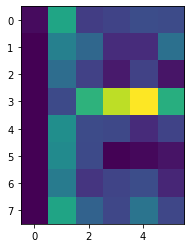

In [19]:
plt.imshow(response[:,0,:,1,0])

In [33]:
orivals = range(0,360,45)
tfvals = [1.,2.]
sizevals = [30,52,67,79,120]

In [32]:
from allensdk.brain_observatory.observatory_plots import plot_mask_outline

In [51]:
metrics['responsive'] = False
metrics.ix[metrics.peak_percent_trials>0.25, 'responsive'] = True

metrics.dir_percent/=50.
metrics['responsive_2'] = False
metrics.ix[metrics.dir_percent>0.6, 'responsive_2'] = True

/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/saskiad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [56]:
metrics.keys()

Index(['Unnamed: 0', 'cell_index', 'dir', 'tf', 'prefsize', 'osi', 'dsi',
       'dir_percent', 'peak_mean', 'peak_std', 'blank_mean', 'blank_std',
       'peak_percent_trials', 'cell_id', 'session_id', 'valid', 'cre', 'area',
       'depth', 'responsive', 'responsive_2'],
      dtype='object')

In [57]:
keys1 = ['valid','responsive','responsive_2','cell_index','cell_id', 'session_id', 'cre', 'area', 'depth', 
         'dir', 'tf', 'prefsize', 'osi', 'dsi', 'peak_mean','peak_std','blank_mean','blank_std', 'peak_percent_trials','dir_percent']

valid = metrics#[metrics_rf.valid]
for index, row in valid.iterrows():
    cell_id = row.cell_id
    session_id = row.session_id
    cell_index = row.cell_index
    pref_ori = orivals[int(row.dir)]
    pref_tf = tfvals[int(row.tf)]
    pref_size = sizevals[int(row.prefsize-1)]
#     print(row.prefsize, pref_size)
        
    analysis_file = os.path.join(analysis_file_path, str(session_id)+'_st_analysis.h5')
    expt_path = r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/Size_Tuning_'+str(session_id)+'_data.h5'
    
    f = h5py.File(analysis_file, 'r')
    response = f['response'][()]
    f.close()
    sweep_response = pd.read_hdf(analysis_file, 'sweep_response')
    stim_table = pd.read_hdf(expt_path, 'drifting_gratings_size')
    
    f = h5py.File(expt_path, 'r')
    mp = f['max_projection'][()]
    rois = f['roi_outlines'][()]
    f.close()
    rois = rois.astype(float)
    rois[rois==0] = np.NaN
    roi_table = pd.read_hdf(expt_path, 'roi_table')
    
    plt.figure(figsize=(25,15))

    ax1 = plt.subplot2grid((3,3),(0,0))
    ax2 = plt.subplot2grid((3,3),(1,0))
    ax3 = plt.subplot2grid((3,3),(0,1), rowspan=2)
#     ax6 = plt.subplot2grid((3,3),(0,2), rowspan=2)
    ax4 = plt.subplot2grid((3,3), (2,0))
    ax5 = plt.subplot2grid((3,3), (2,1))
    ax7 = plt.subplot2grid((3,3),(2,2))
    
    #Tuning curve
    ax1.errorbar(range(5), response[row.dir,row.tf,1:,cell_index,0], 
                 yerr=response[row.dir,row.tf,1:,cell_index,1]/np.sqrt(response[row.dir,row.tf,1:,cell_index,2]), fmt='o-')
    ax1.fill_between(range(5), response[0,0,0,cell_index,0]+(response[0,0,0,cell_index,1]/np.sqrt(response[0,0,0,cell_index,2])), 
                     response[0,0,0,cell_index,0]-(response[0,0,0,cell_index,1]/np.sqrt(response[0,0,0,cell_index,2])), 
                     color='k', alpha=0.3)
    ax1.axhline(y=response[0,0,0,cell_index,0], color='k', ls='--',lw=2)
    
    ax1.set_xticks(range(5));
    ax1.set_xticklabels(sizevals)
    ax1.set_xlabel("Size (deg)", fontsize=16)
    ax1.set_ylabel("DF/F", fontsize=16)
    ax1.set_title(str(pref_ori)+" Deg"+" "+str(pref_tf)+" Hz", fontsize=16)
    sns.despine()

    #Preferred direction
    ax2.plot(sweep_response[(stim_table.Ori==pref_ori)&(stim_table.TF==pref_tf)&(stim_table.Size==pref_size)][str(cell_index)].mean())
    ax2.plot(sweep_response[np.isnan(stim_table.Ori)][str(cell_index)].mean(), color='gray')
    ax2.axvspan(30,90, color='gray', alpha=0.1)
    ax2.set_xticks([30,60,90,120],[0,1,2,3])
    ax2.set_xlabel("Time (s)", fontsize=18)
    ax2.set_ylabel("DFF", fontsize=18)
    ax2.set_title(str(pref_ori)+" Deg"+" "+str(pref_tf)+" Hz"+" "+str(pref_size), fontsize=16)
    sns.despine()
    
    #Heatmap
    ax4.imshow(response[:,0,1:,cell_index,0], vmin=0, vmax=row.peak_mean)
    ax4.set_yticks(range(8))
    ax4.set_yticklabels(orivals)
    ax4.set_xticks(range(5))
    ax4.set_xticklabels(sizevals)
    ax4.set_xlabel("Size")
    ax4.set_ylabel("Direction")
    ax4.set_title("1 Hz", fontsize=16)
    
    ax5.imshow(response[:,1,1:,cell_index,0], vmin=0, vmax=row.peak_mean)
    ax5.set_yticks(range(8))
    ax5.set_yticklabels(orivals)
    ax5.set_xticks(range(5))
    ax5.set_xticklabels(sizevals)
    ax5.set_title("2 Hz", fontsize=16)
    
    #ROI mask
    mask_test = np.zeros((512,512))
    x_start = roi_table.x[cell_index]
    y_start = roi_table.y[cell_index]
    x_delta = np.array(roi_table['mask'][cell_index]).shape[1]
    y_delta = np.array(roi_table['mask'][cell_index]).shape[0]
    mask_test[y_start:y_start+y_delta, x_start:x_start+x_delta] = np.array(roi_table['mask'][cell_index])
    # mask_test[mask_test==0] = np.NaN

    ax7.imshow(mp, cmap='gray')
    # plt.imshow(rois)
    # plt.imshow(mask_test, cmap='viridis_r')
    plot_mask_outline(mask_test, ax7, color='y')
    ax7.set_xlim(x_start-90, x_start+90)
    ax7.set_ylim(y_start+90, y_start-90)
    
    #metrics
    table_data = []
    for key in keys1:
        table_data.append([key, valid[valid.cell_id==cell_id][key].values[0]])
    table = ax3.table(cellText=table_data, loc='center')
    table.set_fontsize(12)
#     table.scale(1,2)
    ax3.axis('off')

    
    plt.suptitle("Session: "+str(session_id)+" Cell: "+str(cell_id), fontsize=18)
    plt.tight_layout()
    plt.savefig(r'/Users/saskiad/Documents/Data/Openscope_Multiplex_trim/analysis/ST_figures/'+str(cell_id)+'.png')
    plt.close()

In [40]:
row.tf

1

In [41]:
tfvals

[1.0, 2.0]

In [42]:
tfvals[int(row.tf)]

2.0

In [43]:
row.prefsize

5